Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0383
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 16/100

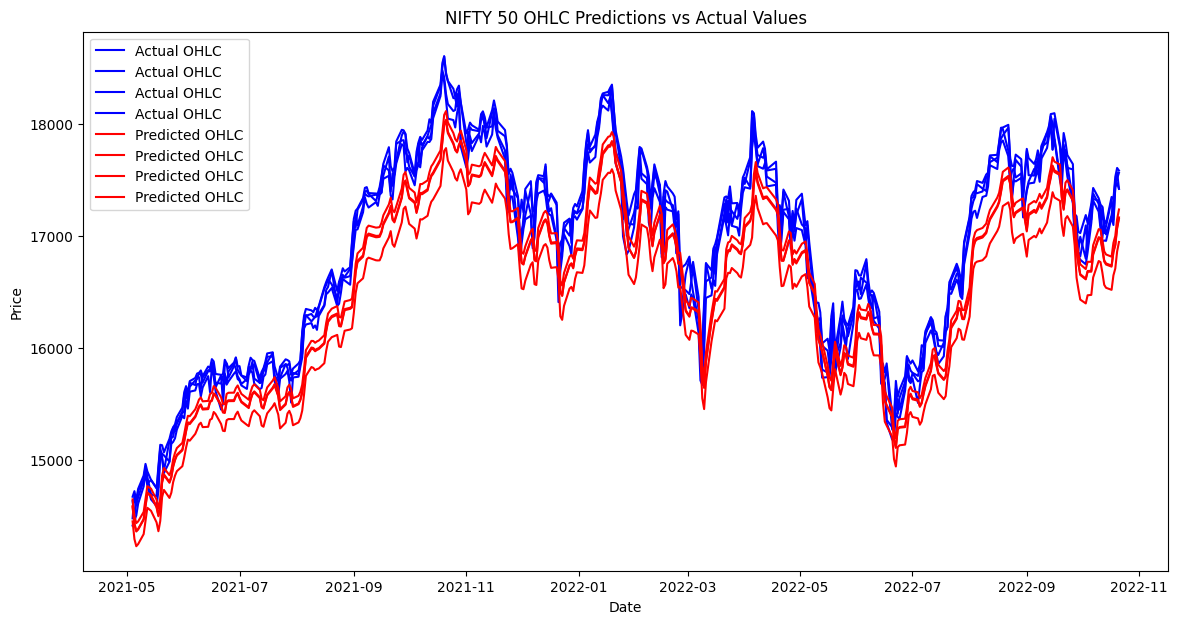

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the Data
data = pd.read_csv('/kaggle/input/nifty-50-1-day-with-indicators-csv-1-87-mb/NIFTY 50 - 1 day_with_indicators_.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

# Step 2: Preprocess the Data
# Select relevant features for prediction
features = data[['open', 'high', 'low', 'close']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Create Sequences for LSTM Input
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 10  # Number of previous days to use for prediction
X, y = create_dataset(scaled_features, time_step)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(4))  # Predicting open, high, low, close

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 5: Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Inverse transform to get actual values

# Visualize Predictions vs Actual Values
plt.figure(figsize=(14, 7))
plt.plot(features.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual OHLC', color='blue')
plt.plot(features.index[-len(y_test):], y_pred, label='Predicted OHLC', color='red')
plt.title('NIFTY 50 OHLC Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 355.76908820461506
Mean Squared Error (MSE): 152082.53706481084
Root Mean Squared Error (RMSE): 389.9776109789007
R-squared (R²): 0.8113088211295054


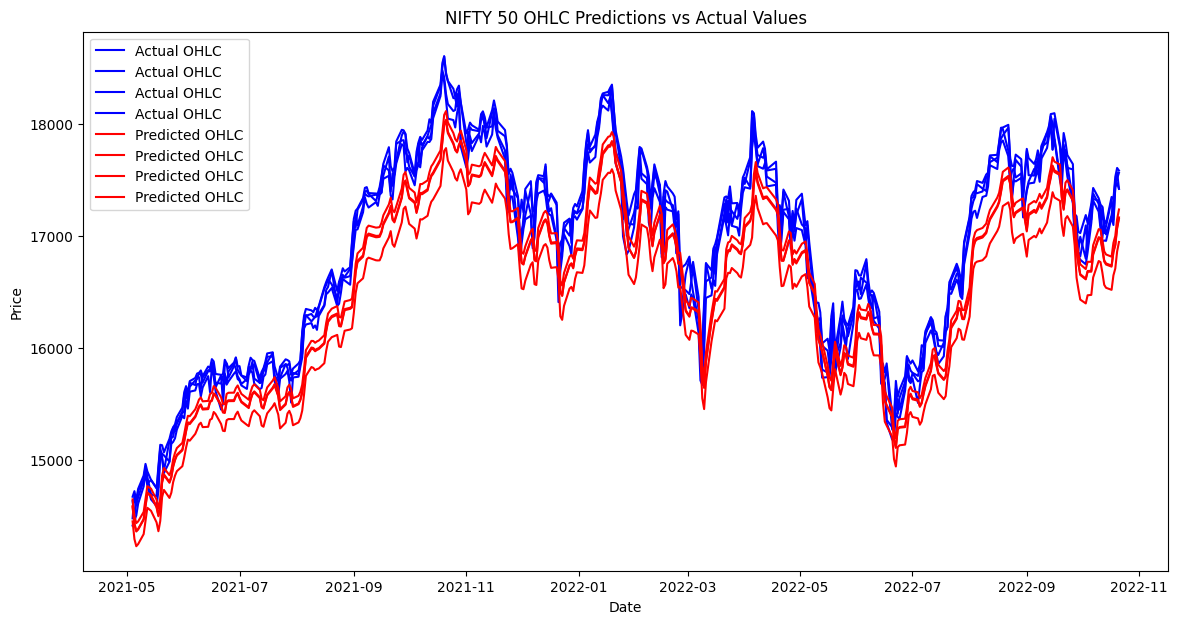

In [14]:
# Step 6: Calculate Evaluation Metrics
mae = mean_absolute_error(scaler.inverse_transform(y_test), y_pred)
mse = mean_squared_error(scaler.inverse_transform(y_test), y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(scaler.inverse_transform(y_test), y_pred)

# Print Evaluation Metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Visualize Predictions vs Actual Values
plt.figure(figsize=(14, 7))
plt.plot(features.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual OHLC', color='blue')
plt.plot(features.index[-len(y_test):], y_pred, label='Predicted OHLC', color='red')
plt.title('NIFTY 50 OHLC Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

close           1.000000
TYPPRICE        0.999933
high            0.999752
low             0.999743
open            0.999466
ema5            0.999326
middleband      0.999006
sma5            0.999006
TRIMA5          0.998872
lowerband       0.998402
ema10           0.998242
upperband       0.997955
KAMA10          0.997770
sma10           0.997546
TRIMA10         0.997240
ema15           0.997111
sma15           0.995998
ema20           0.995967
KAMA20          0.995716
KAMA30          0.994483
sma20           0.994458
TRIMA20         0.993672
HT_TRENDLINE    0.991754
SAR             0.625183
ATR             0.554639
Trange          0.376756
HT_DCPERIOD     0.293148
macd1226        0.238246
macd1520        0.228225
macd1020        0.209062
macd520         0.188880
MOM20           0.166112
APO             0.165816
ULTOSC          0.165272
RSI14           0.158820
MOM15           0.144269
macd510         0.143185
PPO             0.134502
ROC20           0.132972
RSI8            0.118135


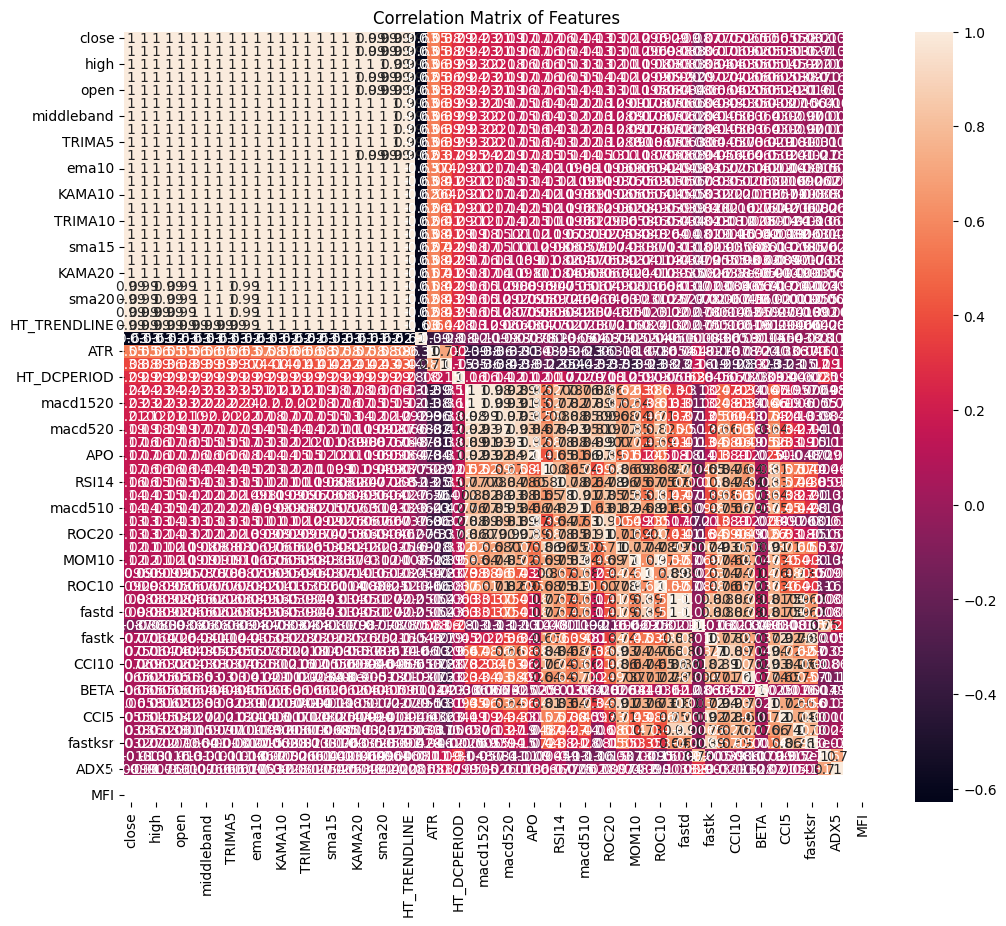

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset again if needed
data = pd.read_csv('/kaggle/input/nifty-50-1-day-with-indicators-csv-1-87-mb/NIFTY 50 - 1 day_with_indicators_.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Select relevant features based on correlation with Close price
target_features = correlation_matrix['close'].abs().sort_values(ascending=False)
print(target_features)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[target_features.index].loc[target_features.index], annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [19]:
# Define a threshold for feature selection
threshold = 0.5  # You can adjust this value based on your needs

# Select features that have an absolute correlation greater than the threshold
selected_features = target_features[target_features > threshold].index.tolist()
print("Selected Features based on correlation with Close price:")
print(selected_features)

Selected Features based on correlation with Close price:
['close', 'TYPPRICE', 'high', 'low', 'open', 'ema5', 'middleband', 'sma5', 'TRIMA5', 'lowerband', 'ema10', 'upperband', 'KAMA10', 'sma10', 'TRIMA10', 'ema15', 'sma15', 'ema20', 'KAMA20', 'KAMA30', 'sma20', 'TRIMA20', 'HT_TRENDLINE', 'SAR', 'ATR']
